Given the root of a binary tree, return all duplicate subtrees.

For each kind of duplicate subtrees, you only need to return the root node of any one of them.

Two trees are duplicate if they have the same structure with the same node values.

 

Example 1:

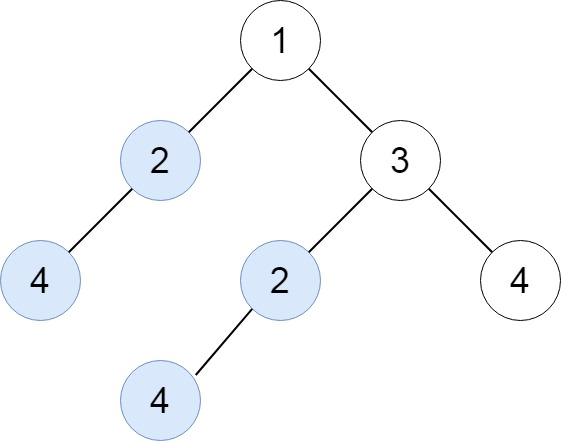

Input: root = [1,2,3,4,null,2,4,null,null,4]
Output: [[2,4],[4]]

Example 2:

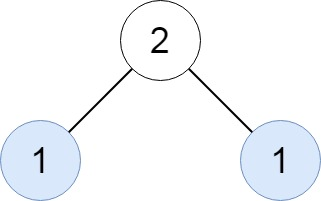

Input: root = [2,1,1]
Output: [[1]]

Example 3:

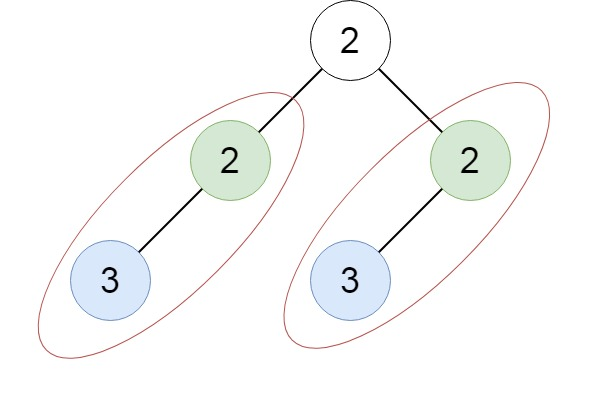

Input: root = [2,2,2,3,null,3,null]
Output: [[2,3],[3]]

 

Constraints:

    The number of the nodes in the tree will be in the range [1, 5000]
    -200 <= Node.val <= 200



In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
DELIMITER = "|"

class Solution:
    def findDuplicateSubtrees(self, root: Optional[TreeNode]) -> List[Optional[TreeNode]]:
        subtree_idx = defaultdict(list)
        def dfs(node, subtree_idx):
            subtree_id = ""
            if node.left:
                left_id = dfs(node.left, subtree_idx)
            else:
                left_id = "None"
            if node.right:
                right_id = dfs(node.right, subtree_idx)
            else:
                right_id = "None"
            subtree_id += DELIMITER + left_id + DELIMITER + str(node.val) + DELIMITER + right_id + DELIMITER
            subtree_idx[subtree_id].append(node)
            return subtree_id

        dfs(root, subtree_idx)
        ans = []
        for nodes in subtree_idx.values():
            if len(nodes) > 1:
                ans.append(nodes[0])
        
        return ans